### Imports

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Set the default seaborn style to 'darkgrid'
sns.set_theme(style="darkgrid")

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

### Aðeins að skoða gögn og þannig
Virðist vera að við joinum á `HEINUM` til að sameina **kaupskra** og **stadfangaskra**, og svo er `FASTNUM` unique id fyrir hverja og eina fasteign.

Lýsingar á gögnunum: https://www.fasteignaskra.is/gogn/grunngogn-til-nidurhals/kaupskra-fasteigna/eigindalysing-kaupskrar & https://www.fasteignaskra.is/library/Samnyttar-skrar-/Fyrirtaeki-stofnanir/Nidurhal/Sta%C3%B0fangaskr%C3%A1%20eigindal%C3%BDsing.pdf

In [19]:
# Þessir path-ar virka bara fyrir Þór
fig_path = '/Users/thorg/Documents/GitHub/thg205.github.io/assets'
kaupskra_path = '/Users/thorg/Desktop/kaupskra.csv'
stadfangaskra_path = '/Users/thorg/Desktop/stadfangaskra.csv'

In [29]:
# Reading in kaupskra and stadfangaskra data
kaupskra = pd.read_csv(kaupskra_path, encoding='latin1', sep=';')
stadfangaskra = pd.read_csv(stadfangaskra_path, encoding='utf-8', sep=',')

In [56]:
#kaupskra
#kaupskra.loc[(kaupskra['HEINUM'] == 1024617) & (kaupskra['FASTNUM'] == 2067729)]
#kaupskra.loc[kaupskra['HEIMILISFANG'] == 'Kolbeinsmýri 10']

In [55]:
#stadfangaskra
#stadfangaskra.loc[stadfangaskra['HEINUM'] == 1024617]

In [142]:
# Lets join kaupskra and stadfangaskra together on HEINUM to form our dataset
data = pd.merge(kaupskra, stadfangaskra, on='HEINUM') # inner join
data.shape

(193005, 52)

In [113]:
data.head()

,FAERSLUNUMER,EMNR,SKJALANUMER,FASTNUM,HEIMILISFANG,POSTNR_x,HEINUM,SVFN,SVEITARFELAG,UTGDAG,THINGLYSTDAGS,KAUPVERD,FASTEIGNAMAT,FASTEIGNAMAT_GILDANDI,BRUNABOTAMAT_GILDANDI,BYGGAR,FEPILOG,EINFLM,LOD_FLM,LOD_FLMEIN,FJHERB,TEGUND,FULLBUID,ONOTHAEFUR_SAMNINGUR,FID,HNITNUM,SVFNR,BYGGD,LANDNR,MATSNR,POSTNR_y,HEITI_NF,HEITI_TGF,HUSNR,BOKST,VIDSK,SERHEITI,DAGS_INN,DAGS_LEIDR,GAGNA_EIGN,TEGHNIT,YFIRFARID,YFIRF_HEITI,ATH,NAKV_XY,HNIT,N_HNIT_WGS84,E_HNIT_WGS84,NOTNR,LM_HEIMILISFANG,VEF_BIRTING,HUSMERKING
0,500342,411,R-005069/2006,2067729,Melabraut 3,170,1024617,1100,Seltjarnarnesbær,2006-05-08 00:00:00.0,2006-05-10 09:22:39.0,25500,19610,90600.0,53950.0,1963,010101,102.3,NaN,NaN,3.0,Fjölbýli,1,1,Stadfangaskra.fid-24f8547a_18ebb06342d_-3298,10032272,1100,1,117368,NaN,170,Melabraut,Melabraut,3.0,NaN,NaN,NaN,2007-09-07,2009-02-23,HMS,0.0,0.0,NaN,NaN,NaN,POINT (354080 408959),64.152289,-21.999498,956.0,Melabraut 3 (117368),Melabraut 3 (117368),3
1,679963,441,D-006418/2021,2067730,Melabraut 3,170,1024617,1100,Seltjarnarnesbær,2021-10-21 00:00:00.0,2021-10-25 15:18:50.0,50000,62250,100400.0,67900.0,1963,010201,139.8,820.0,m²,2.0,Fjölbýli,1,0,Stadfangaskra.fid-24f8547a_18ebb06342d_-3298,10032272,1100,1,117368,NaN,170,Melabraut,Melabraut,3.0,NaN,NaN,NaN,2007-09-07,2009-02-23,HMS,0.0,0.0,NaN,NaN,NaN,POINT (354080 408959),64.152289,-21.999498,956.0,Melabraut 3 (117368),Melabraut 3 (117368),3
2,680332,441,A-009807/2021,2067729,Melabraut 3,170,1024617,1100,Seltjarnarnesbær,2021-11-01 00:00:00.0,2021-11-04 15:14:48.0,44000,48850,90600.0,53950.0,1963,010101,102.3,820.0,m²,3.0,Fjölbýli,1,0,Stadfangaskra.fid-24f8547a_18ebb06342d_-3298,10032272,1100,1,117368,NaN,170,Melabraut,Melabraut,3.0,NaN,NaN,NaN,2007-09-07,2009-02-23,HMS,0.0,0.0,NaN,NaN,NaN,POINT (354080 408959),64.152289,-21.999498,956.0,Melabraut 3 (117368),Melabraut 3 (117368),3
3,702045,441,B-005352/2023,2526176,Melabraut 3,170,1024617,1100,Seltjarnarnesbær,2023-06-27 00:00:00.0,2023-08-03 12:17:21.0,119900,10200,99350.0,67950.0,,010301,129.5,820.0,m²,2.0,Fjölbýli,1,1,Stadfangaskra.fid-24f8547a_18ebb06342d_-3298,10032272,1100,1,117368,NaN,170,Melabraut,Melabraut,3.0,NaN,NaN,NaN,2007-09-07,2009-02-23,HMS,0.0,0.0,NaN,NaN,NaN,POINT (354080 408959),64.152289,-21.999498,956.0,Melabraut 3 (117368),Melabraut 3 (117368),3
4,705839,441,B-010279/2023,2067729,Melabraut 3,170,1024617,1100,Seltjarnarnesbær,2023-11-15 00:00:00.0,2023-11-25 14:57:33.0,86500,84300,90600.0,53950.0,2023,010101,107.2,820.0,m²,3.0,Fjölbýli,1,1,Stadfangaskra.fid-24f8547a_18ebb06342d_-3298,10032272,1100,1,117368,NaN,170,Melabraut,Melabraut,3.0,NaN,NaN,NaN,2007-09-07,2009-02-23,HMS,0.0,0.0,NaN,NaN,NaN,POINT (354080 408959),64.152289,-21.999498,956.0,Melabraut 3 (117368),Melabraut 3 (117368),3


In [143]:
data['SVEITARFELAG'] = data['SVEITARFELAG'].str.strip()

In [144]:
print('Oldest record is from', data['THINGLYSTDAGS'].min())
print('Newest record is from', data['THINGLYSTDAGS'].max())

Oldest record is from 2006-05-08 08:19:48.0
Newest record is from 2024-03-20 15:32:57.0


In [145]:
# Dropping unnecessary columns/data
unnecessary_cols = ['FEPILOG','FID','SVFNR','MATSNR','POSTNR_y','HEITI_NF','HEITI_TGF',
                  'HUSNR','VIDSK','SERHEITI', 'GAGNA_EIGN', 'YFIRF_HEITI', 'NOTNR', 'LM_HEIMILISFANG', 
                    'VEF_BIRTING', 'HUSMERKING']

data = data.drop(columns=unnecessary_cols)

In [146]:
data['THINGLYSTDAGS'] = pd.to_datetime(data['THINGLYSTDAGS']) # Converting to datetime

In [147]:
mun_count = data.groupby('SVEITARFELAG').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
focus_municipalities = mun_count.head(16)['SVEITARFELAG'].tolist()


In [148]:
# Plot the sveitarfelag distribution
municipalities = data['SVEITARFELAG'].unique()
print('Total number of municipalities are', len(municipalities))

Total number of municipalities are 64


In [149]:
data = data.loc[data['SVEITARFELAG'].isin(focus_municipalities)]
data = data.loc[data['ONOTHAEFUR_SAMNINGUR'] == 0]

### Aðeins að plotta gögn og þannig

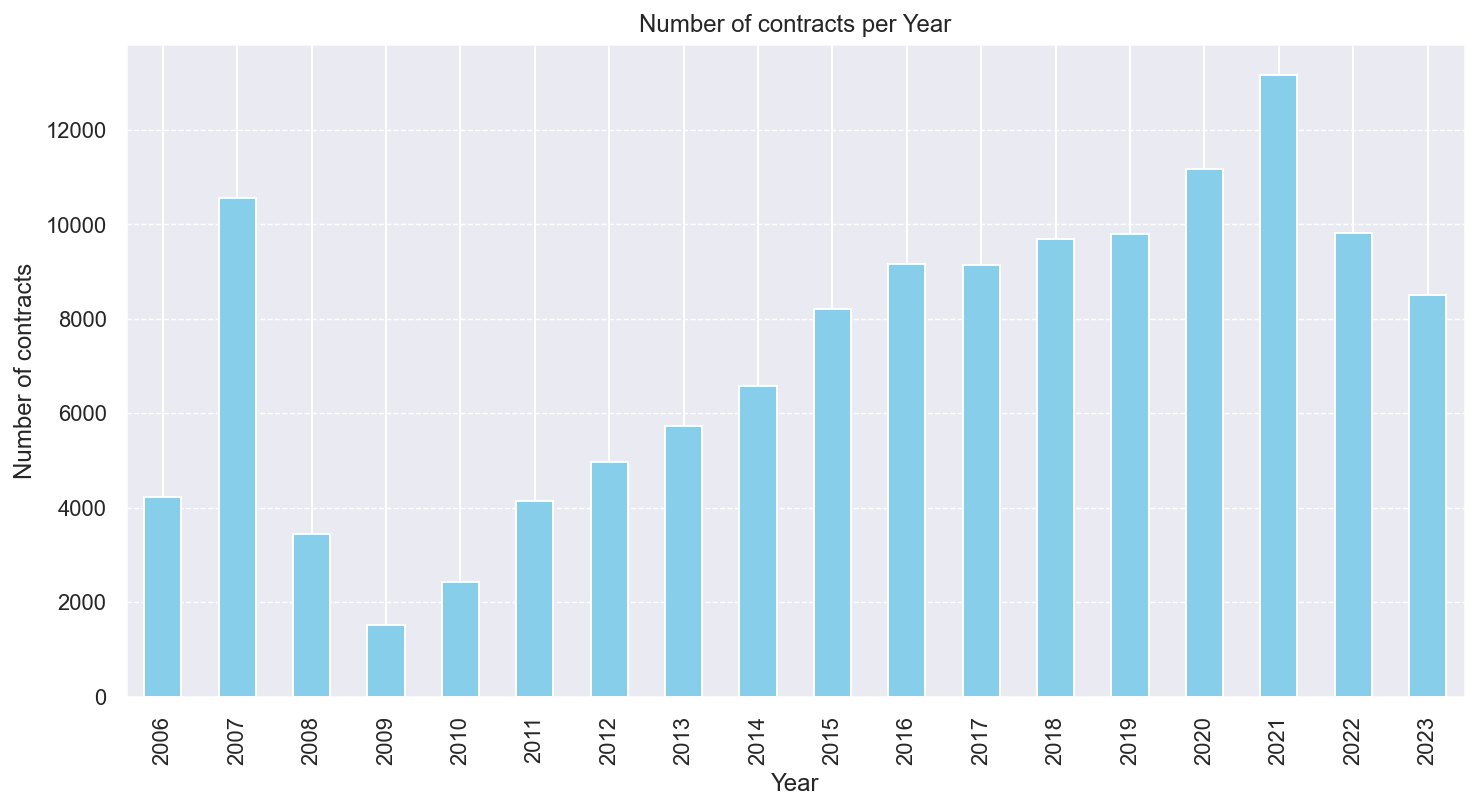

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the Year temporarily and count records, excluding 2024
yearly_counts = data['THINGLYSTDAGS'].dt.year[data['THINGLYSTDAGS'].dt.year != 2024].value_counts()

# Sort the years
yearly_counts = yearly_counts.sort_index()

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
yearly_counts.plot(kind='bar', color='skyblue')  # Create a bar chart
plt.title('Number of contracts per Year')
plt.xlabel('Year')
plt.ylabel('Number of contracts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines
plt.show()

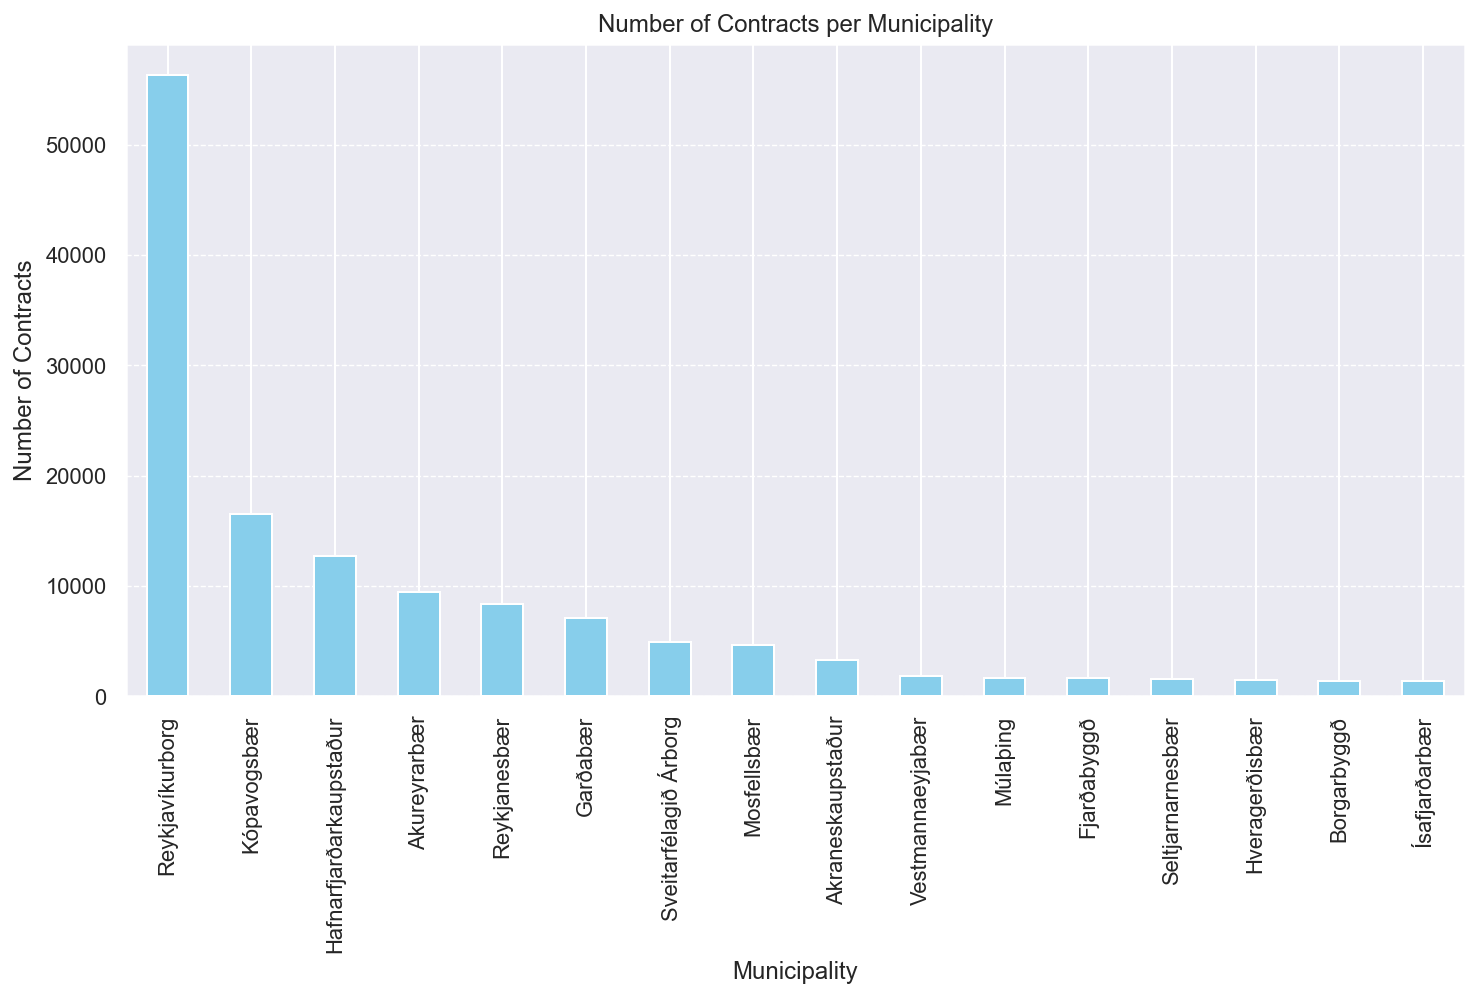

In [151]:
# Extract the municipalities data
municipalities_counts = data['SVEITARFELAG'].value_counts()

# The data is already sorted by count in descending order due to value_counts()

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
municipalities_counts.plot(kind='bar', color='skyblue')  # Create a bar chart
plt.title('Number of Contracts per Municipality')
plt.xlabel('Municipality')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines
plt.show()

In [169]:
import numpy as np
import pandas as pd
import folium

# Assuming 'UTGDAG' is a datetime column, we first ensure it's in the correct dtype
data['UTGDAG'] = pd.to_datetime(data['UTGDAG'])

# Filter data between 2016-06-01 and 2016-07-31
map_data = data[(data['UTGDAG'] >= '2016-06-01') & (data['UTGDAG'] <= '2016-07-31')][['HEIMILISFANG', 'N_HNIT_WGS84', 'E_HNIT_WGS84']]

iceland_map = folium.Map(location=[64.9631, -19.0208], zoom_start=6, tiles='CartoDB Positron')

# Add smaller markers/dots for incidents
for index, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['N_HNIT_WGS84'], row['E_HNIT_WGS84']],
        radius=1,  # Adjust the radius as needed
        color='red',
        fill=True,
        fill_color='red',
        popup=row['HEIMILISFANG']
    ).add_to(iceland_map)

iceland_map


# Motivation
- What is your dataset?
- Why did you choose this/these particular dataset(s)?
- What was your goal for the end user's experience?

# Basic stats
Let's understand the dataset better:
- Write about your choices in data cleaning and preprocessing
- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

# Data Analysis
- Describe your data analysis and explain what you've learned about the dataset.
- If relevant, talk about your machine-learning.


# Genre
Which genre of data story did you use?
- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?


# Visualizations
- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?


# Discussion
Think critically about your creation
What went well?,
What is still missing? What could be improved?, Why?

# Contributions
Who did what?
- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
- It is not OK simply to write "All group members contributed equally".